<a href="https://colab.research.google.com/github/harini-3005/shadowfox/blob/main/intermediatetask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving X data.csv to X data.csv


Dataset Shape: (162980, 2)

First 5 rows:
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

Column names:
Index(['clean_text', 'category'], dtype='object')

Sentiment Distribution:
category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64


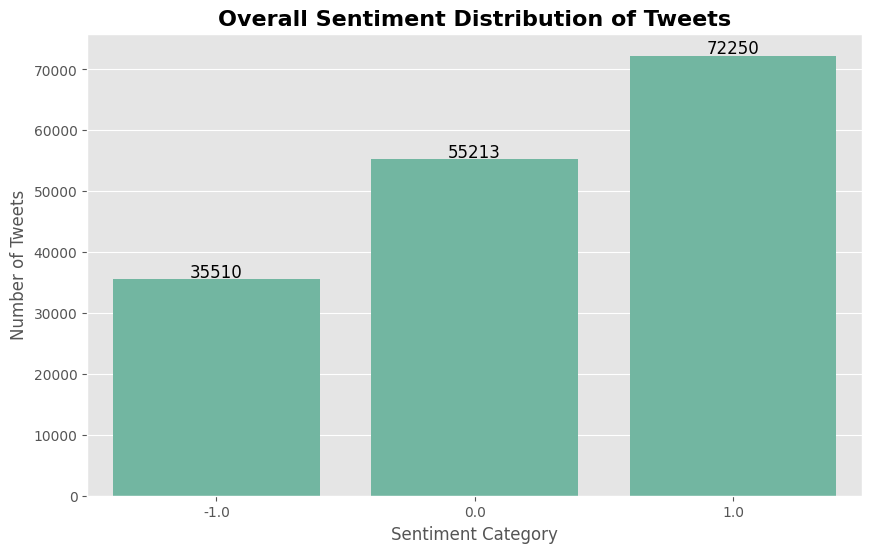


Sentiment Percentages:
Positive: 44.33%
Neutral: 33.88%
Negative: 21.79%


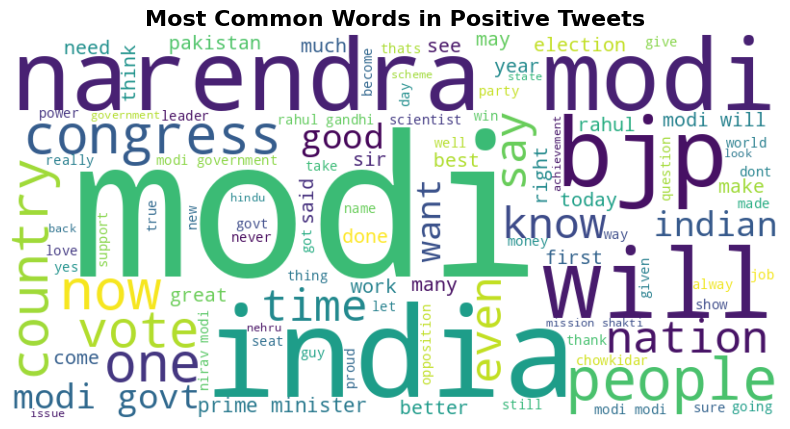

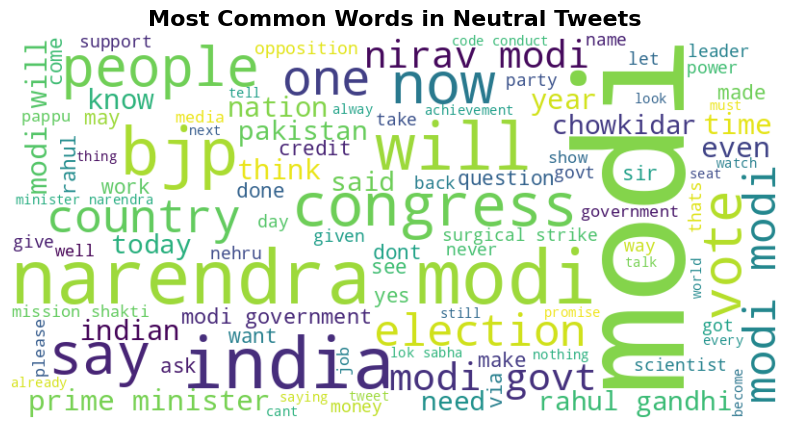

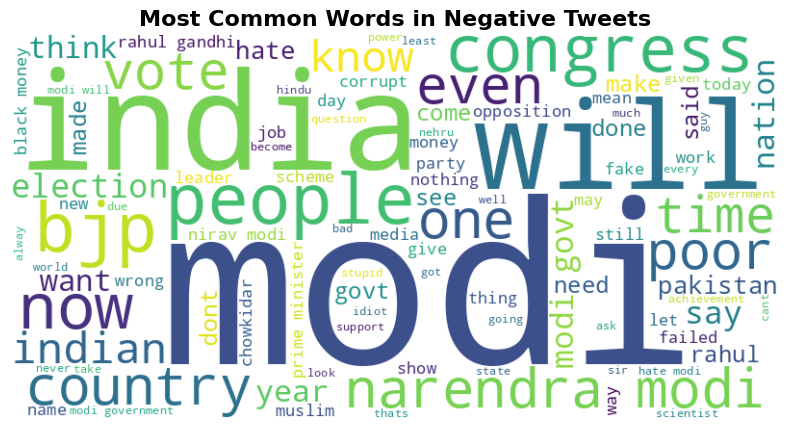

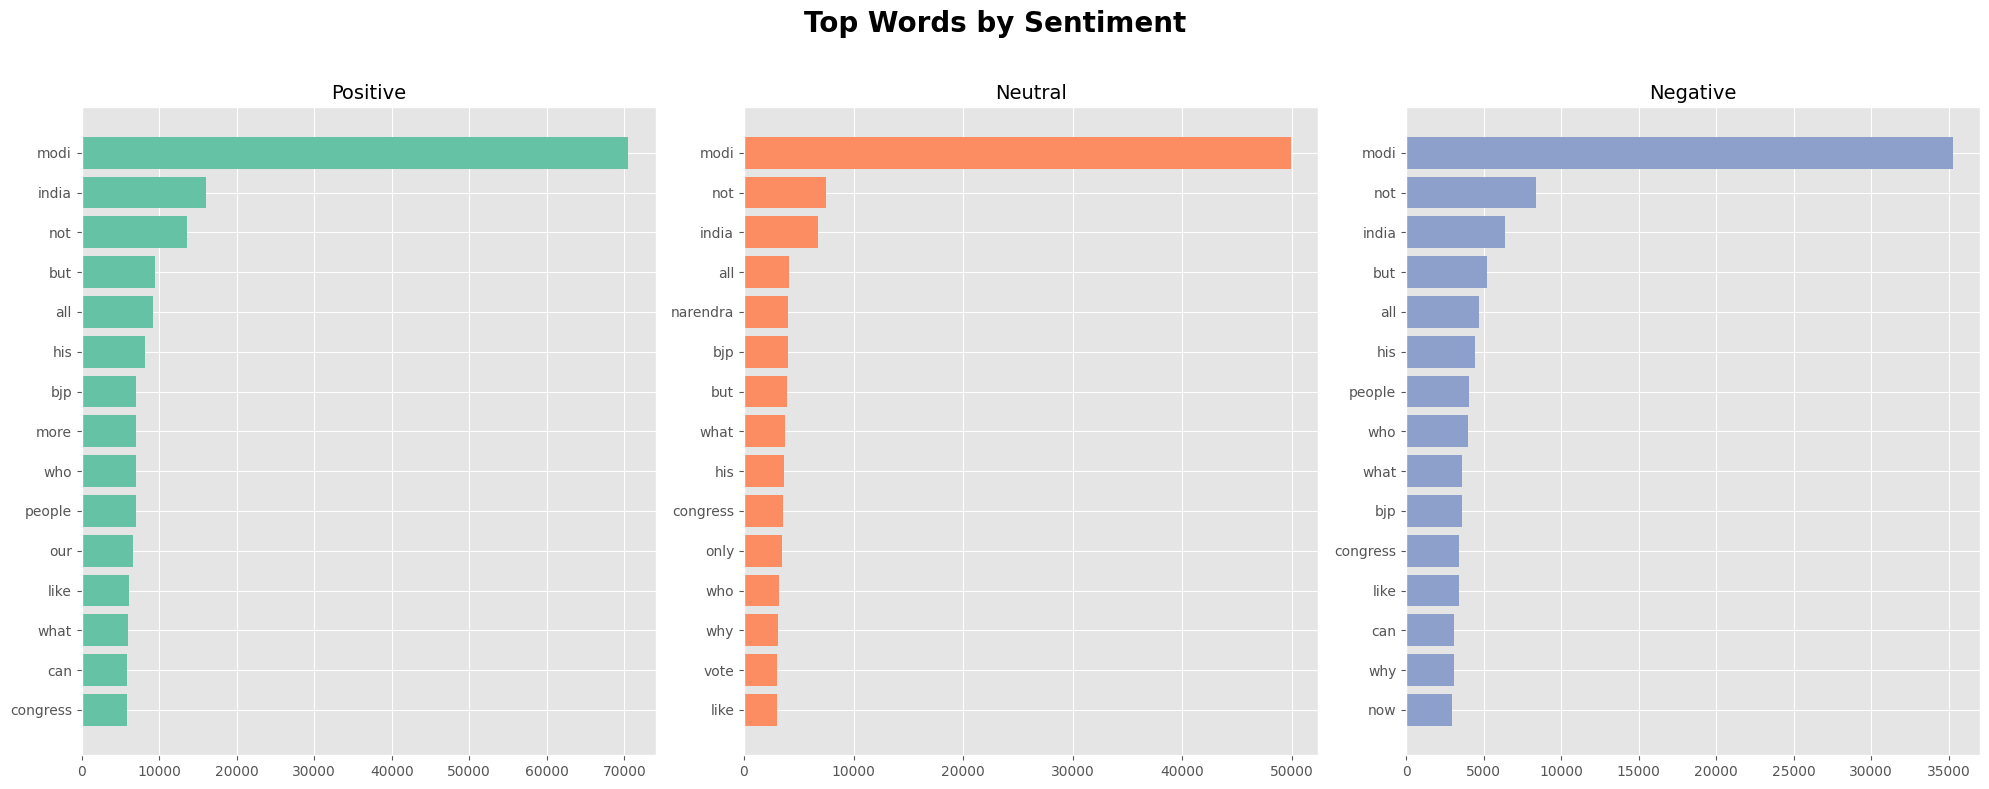

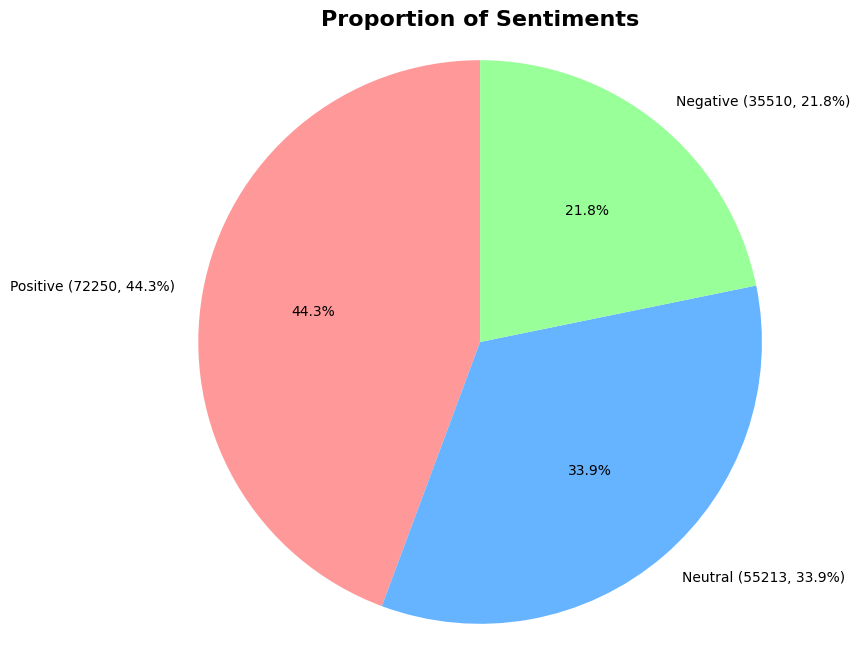


Analysis Complete!


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re

# Set the visual style
plt.style.use('ggplot')
sns.set_palette("Set2")
%matplotlib inline



# Read the dataset (replace 'your_file.csv' with your actual filename)
file_name = list(uploaded.keys())[0] # This gets the name of the uploaded file
df = pd.read_csv(file_name)

# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn names:")
print(df.columns)
print("\nSentiment Distribution:")
print(df['category'].value_counts())

# 2. Basic Sentiment Distribution Plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='category', data=df)
plt.title('Overall Sentiment Distribution of Tweets', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Tweets')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Calculate percentages
total = len(df)
positive_pct = (df['category'] == 1).sum() / total * 100
neutral_pct = (df['category'] == 0).sum() / total * 100
negative_pct = (df['category'] == -1).sum() / total * 100

print(f"\nSentiment Percentages:")
print(f"Positive: {positive_pct:.2f}%")
print(f"Neutral: {neutral_pct:.2f}%")
print(f"Negative: {negative_pct:.2f}%")

# 3. Preprocess Text for Word Clouds (if not already fully cleaned)
def basic_clean(text):
    # Ensure text is a string
    text = str(text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase and split
    words = text.lower().split()
    # Remove short words (optional)
    words = [w for w in words if len(w) > 2]
    return " ".join(words)

# Apply basic cleaning
df['cleaned_for_wc'] = df['clean_text'].apply(basic_clean)

# 4. Generate and Plot Word Clouds for Each Sentiment

# Define a function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          stopwords=set(STOPWORDS), # You can add more stopwords here if needed
                          colormap='viridis', # Try 'plasma', 'inferno', 'magma' for different colors
                          max_words=100).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment
sentiments = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}

for sentiment_value, sentiment_name in sentiments.items():
    # Combine all text for this sentiment
    text = ' '.join(df[df['category'] == sentiment_value]['cleaned_for_wc'])
    if text.strip(): # Check if there is any text
        generate_wordcloud(text, f'Most Common Words in {sentiment_name} Tweets')
    else:
        print(f"No text data for {sentiment_name} sentiment.")

# 5. Analyze Most Frequent Words by Sentiment

# Function to get top N words for a sentiment
def get_top_words(sentiment_value, n=15):
    text = ' '.join(df[df['category'] == sentiment_value]['cleaned_for_wc'])
    words = text.split()
    word_counts = Counter(words)
    # Remove common stopwords that might have been missed
    stop_words = set(['the', 'and', 'for', 'are', 'with', 'this', 'that', 'was', 'has', 'have', 'you', 'your', 'they', 'their', 'will', 'from'])
    filtered_words = {word: count for word, count in word_counts.items() if word not in stop_words}
    return Counter(filtered_words).most_common(n)

# Create a figure for word frequency bars
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('Top Words by Sentiment', fontsize=20, fontweight='bold')

for i, (sentiment_value, sentiment_name) in enumerate(sentiments.items()):
    top_words = get_top_words(sentiment_value)
    if top_words:
        words, counts = zip(*top_words)
        axes[i].barh(words, counts, color=sns.color_palette("Set2")[i])
        axes[i].set_title(sentiment_name, fontsize=14)
        axes[i].invert_yaxis() # Display the highest count at the top
    else:
        axes[i].set_title(f"No data for {sentiment_name}", fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for the main title
plt.show()

# 6. (Optional) Sentiment Distribution Pie Chart
plt.figure(figsize=(8, 8))
sentiment_counts = df['category'].value_counts()
labels = [f'{sentiments[idx]} ({count}, {count/total*100:.1f}%)' for idx, count in sentiment_counts.items()]
colors = ['#ff9999', '#66b3ff', '#99ff99'] # Red, Blue, Green
plt.pie(sentiment_counts.values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Sentiments', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print("\nAnalysis Complete!")